# UK Gender Pay Gap Analysis Final Report

Bea Igbokwe, Anusha Ramprasad, Nivedita Ravi
<br>
IST 462/652
<br>
December 7, 2022

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

***

## Data Cleaning
<br>
To start the analysis of the UK gender pay gap, we read the csv files for the years 2019 through 2021, omitting columns that would not be utilized within our analysis. We determined the columns pertaining to income and employer size for each company would be our focus for this analysis. 
<br>

These columns were EmployerName, DiffMeanHourlyPercent, DiffMedianHourlyPercent, DiffMeanBonusPercent, DiffMedianBonusPercent, MaleBonusPercent, FemaleBonusPercent, MaleLowerQuartile, FemaleLowerQuartile, MaleLowerMiddleQuartile, FemaleLowerMiddleQuartile, MaleUpperMiddleQuartile, FemaleUpperMiddleQuartile, MaleTopQuartile, FemaleTopQuartile, and EmployerSize-- leaving us with 16 columns remaining from our original 27. Columns 2 through 4 focus on the difference of pay between men and women, measuring the mean/median of hourly/bonus pay, with a negative value in the dataset implying there are higher percentage of women with the higher pay. Columns 5 through 15 divide the hourly pay of employees into quartiles, then further divides them into male and female-- these two columns for each division adding up to 100. For the last column, each row had a value out of a list to provide data on the employer size: "Less than 250", "250 to 499", "500 to 999", "1000 to 4999","5000 to 19,999", "20,000 or more", "Not Provided".

<br>
By observing the info for each dataset, we could conclude the size of our datasets and which columns contained null values. For the years 2020 and 2021, there were over 10,000 rows with 2019 having significantly less rows at a bit over 6,900 rows.

In [2]:
gpg_2021 = pd.read_csv("https://gender-pay-gap.service.gov.uk/viewing/download-data/2021")

In [3]:
gpg_21 = gpg_2021.drop(["Address", "PostCode", "CompanyNumber", "SicCodes", "ResponsiblePerson", "CompanyLinkToGPGInfo", "CurrentName", "DueDate","EmployerId", "DateSubmitted", "SubmittedAfterTheDeadline" ], axis = 1)

In [4]:
gpg_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10492 entries, 0 to 10491
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               10492 non-null  object 
 1   DiffMeanHourlyPercent      10492 non-null  float64
 2   DiffMedianHourlyPercent    10492 non-null  float64
 3   DiffMeanBonusPercent       7685 non-null   float64
 4   DiffMedianBonusPercent     7685 non-null   float64
 5   MaleBonusPercent           10492 non-null  float64
 6   FemaleBonusPercent         10492 non-null  float64
 7   MaleLowerQuartile          10295 non-null  float64
 8   FemaleLowerQuartile        10295 non-null  float64
 9   MaleLowerMiddleQuartile    10295 non-null  float64
 10  FemaleLowerMiddleQuartile  10295 non-null  float64
 11  MaleUpperMiddleQuartile    10295 non-null  float64
 12  FemaleUpperMiddleQuartile  10295 non-null  float64
 13  MaleTopQuartile            10295 non-null  flo

In [5]:
gpg_20 = pd.read_csv("https://gender-pay-gap.service.gov.uk/viewing/download-data/2020", 
                     usecols=['DiffMeanBonusPercent',
 'DiffMeanHourlyPercent',
 'DiffMedianBonusPercent',
 'DiffMedianHourlyPercent',
 'EmployerName',
 'EmployerSize',
 'FemaleBonusPercent',
 'FemaleLowerMiddleQuartile',
 'FemaleLowerQuartile',
 'FemaleTopQuartile',
 'FemaleUpperMiddleQuartile',
 'MaleBonusPercent',
 'MaleLowerMiddleQuartile',
 'MaleLowerQuartile',
 'MaleTopQuartile',
 'MaleUpperMiddleQuartile'])

In [6]:
gpg_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               10532 non-null  object 
 1   DiffMeanHourlyPercent      10532 non-null  float64
 2   DiffMedianHourlyPercent    10532 non-null  float64
 3   DiffMeanBonusPercent       7894 non-null   float64
 4   DiffMedianBonusPercent     7894 non-null   float64
 5   MaleBonusPercent           10532 non-null  float64
 6   FemaleBonusPercent         10532 non-null  float64
 7   MaleLowerQuartile          10332 non-null  float64
 8   FemaleLowerQuartile        10332 non-null  float64
 9   MaleLowerMiddleQuartile    10332 non-null  float64
 10  FemaleLowerMiddleQuartile  10332 non-null  float64
 11  MaleUpperMiddleQuartile    10332 non-null  float64
 12  FemaleUpperMiddleQuartile  10332 non-null  float64
 13  MaleTopQuartile            10332 non-null  flo

In [7]:
gpg_19 = pd.read_csv("https://gender-pay-gap.service.gov.uk/viewing/download-data/2019", 
                     usecols=['DiffMeanBonusPercent',
 'DiffMeanHourlyPercent',
 'DiffMedianBonusPercent',
 'DiffMedianHourlyPercent',
 'EmployerName',
 'EmployerSize',
 'FemaleBonusPercent',
 'FemaleLowerMiddleQuartile',
 'FemaleLowerQuartile',
 'FemaleTopQuartile',
 'FemaleUpperMiddleQuartile',
 'MaleBonusPercent',
 'MaleLowerMiddleQuartile',
 'MaleLowerQuartile',
 'MaleTopQuartile',
 'MaleUpperMiddleQuartile'])

In [8]:
gpg_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6921 entries, 0 to 6920
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               6921 non-null   object 
 1   DiffMeanHourlyPercent      6921 non-null   float64
 2   DiffMedianHourlyPercent    6921 non-null   float64
 3   DiffMeanBonusPercent       5205 non-null   float64
 4   DiffMedianBonusPercent     5203 non-null   float64
 5   MaleBonusPercent           6921 non-null   float64
 6   FemaleBonusPercent         6921 non-null   float64
 7   MaleLowerQuartile          6921 non-null   float64
 8   FemaleLowerQuartile        6921 non-null   float64
 9   MaleLowerMiddleQuartile    6921 non-null   float64
 10  FemaleLowerMiddleQuartile  6921 non-null   float64
 11  MaleUpperMiddleQuartile    6921 non-null   float64
 12  FemaleUpperMiddleQuartile  6921 non-null   float64
 13  MaleTopQuartile            6921 non-null   float

## Data Exploration of Employer Size

Next, we wanted to observe pay disparity based on the employer size. Focusing on the datasets for the years 2019 and 2021, we created visualizations to analyze how employer size changes the average hourly pay for men and women. To create comprehensive visualizations, we decided to use boxen plots that shows the distribution of each employer size value and order it from smallest to largest, with the last value being "Not Provided". To use this variable to analyze pay disparity, we decided to focus on the difference in the average hourly pay, which provides a percentage for each employer indicating a numeric value that is negative or positive. 

In [9]:
gpg_21['EmployerSize'].unique()

array(['1000 to 4999', '250 to 499', 'Less than 250', '5000 to 19,999',
       '500 to 999', 'Not Provided', '20,000 or more'], dtype=object)

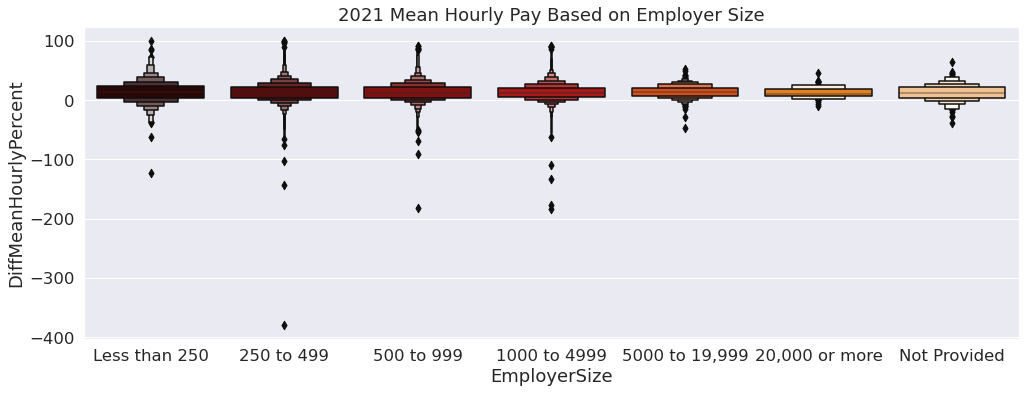

In [10]:
sns.set(rc={'figure.figsize':(16.75,5.75)}, font_scale = 1.5)
sns.boxenplot(data=gpg_21, 
            x = "EmployerSize", 
            y = "DiffMeanHourlyPercent",
            order = ["Less than 250", "250 to 499", "500 to 999", "1000 to 4999",
                    "5000 to 19,999", "20,000 or more", "Not Provided"],
            palette = "gist_heat"
             ).set(title='2021 Mean Hourly Pay Based on Employer Size')
plt.savefig('EmplySize21.pdf')

From looking at the visualization, it appears there are extreme outliers for women, as the negative values represent bias for women. These outliers appear to be more apparent for employer sizes less than 5000. Despite the outliers representing women, the boxen plots show the average mean hourly pay favors men as the median line is above 0.

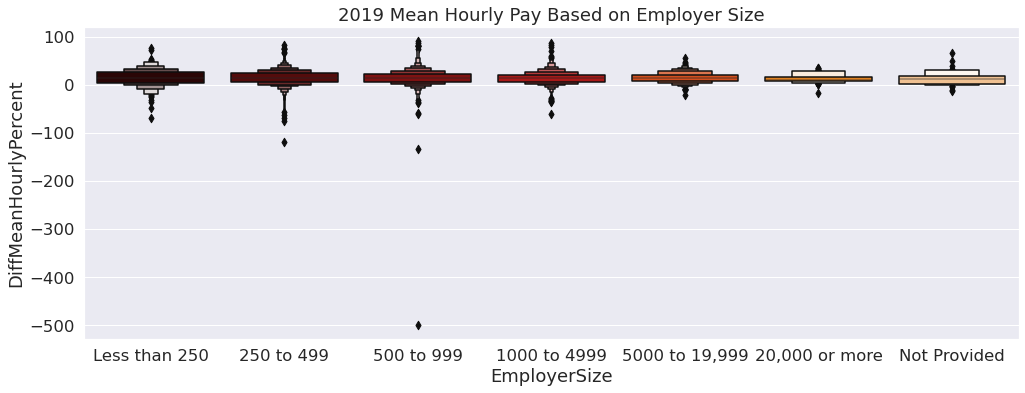

In [11]:
sns.set(rc={'figure.figsize':(16.75,5.75)}, font_scale = 1.5)
sns.boxenplot(data=gpg_19, 
            x = "EmployerSize", 
            y = "DiffMeanHourlyPercent",
            order = ["Less than 250", "250 to 499", "500 to 999", "1000 to 4999",
                    "5000 to 19,999", "20,000 or more", "Not Provided"],
            palette = "gist_heat"
             ).set(title='2019 Mean Hourly Pay Based on Employer Size')
plt.savefig('EmplySize19.pdf')

Similarly to the boxen plot for 2021, there are extreme outliers for the women who have an hourly pay largerly greater than the average. For this year, however, there is less of a disparity with the gap appearing to be smaller between men and women. Some factors for this could be related to the amount of data received for this year compared to 2021 and prehaps an increase in diversity of job roles in 2021.

## Data Exploration of Employer

To explore gender bias amongst employers, we decided to focus on the extreme ends of our datasets. Looking at median hourly pay, we extracted the 5 employers who had the highest median hourly pay for men and the 5 employers who had the highest median hourly pay for women, then we created two small dataframes that can be used for graphs. For this data exploration we looked at the year 2021 to gain some insight before doing further analysis.

In [12]:
top5_21 = gpg_21.nlargest(5, 'DiffMedianHourlyPercent')
top5_21

,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize
689,ATFC LIMITED,0.0,100.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250 to 499
4343,HPI UK HOLDING LTD.,100.0,100.0,2.0,59.0,11.0,4.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,250 to 499
5517,M. ANDERSON CONSTRUCTION LIMITED,100.0,100.0,100.0,100.0,14.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,250 to 499
7197,PSJ FABRICATIONS LTD,100.0,100.0,100.0,100.0,3.7,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,Less than 250
4369,HULL COLLABORATIVE ACADEMY TRUST,45.0,93.0,NaN,NaN,0.0,0.0,3.0,97.0,3.0,97.0,17.0,83.0,17.0,83.0,Not Provided


[Text(0.5, 1.0, 'Top 5 Employers for Men')]

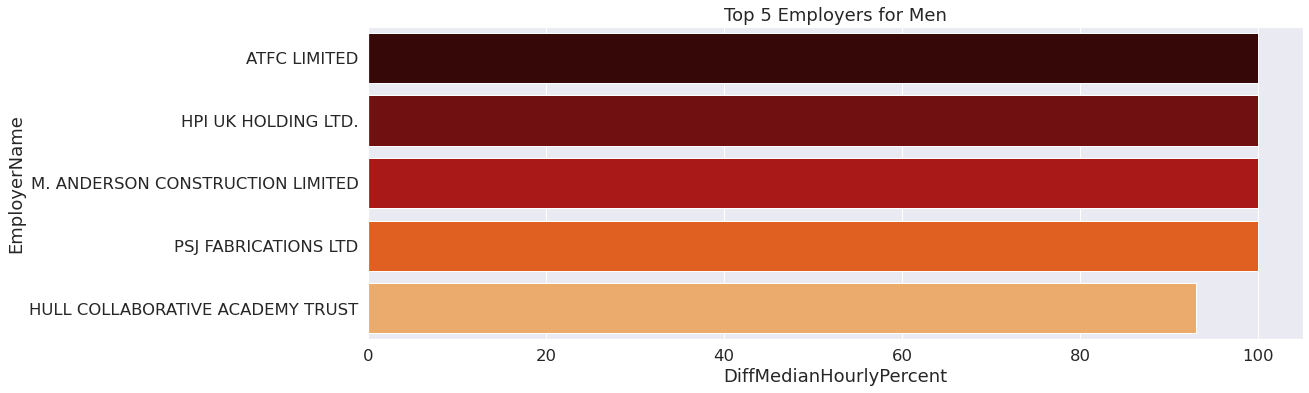

In [13]:
sns.barplot(data=top5_21,
            y = "EmployerName",
            x = 'DiffMedianHourlyPercent', 
            orient = "h",
           palette = "gist_heat"
           ).set(title="Top 5 Employers for Men")

By observing this bar plot, it is concluded there is a gender bias amongst some employers that is most likely affected by the industry. From this vizualization, we can see several construction companies that have 100% median hourly pay for men, implying there really isn't any women in this company to begin with.

In [14]:
last5_21 = gpg_21.nsmallest(5, 'DiffMedianHourlyPercent')
last5_21

,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize
472,ANKH CONCEPTS HOSPITALITY MANAGEMENT LIMITED,-379.6,-499.5,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250 to 499
7256,QUEST PAY SOLUTIONS NE LIMITED,-90.0,-131.0,NaN,NaN,0.0,0.0,95.0,5.0,92.0,8.0,95.0,5.0,29.0,71.0,500 to 999
3449,FORTEL SERVICES LIMITED,-184.2,-128.8,63.5,-6.7,12.9,30.4,93.4,6.6,99.0,1.0,96.1,3.9,99.5,0.5,1000 to 4999
7522,RLC (UK) LIMITED,-40.9,-121.5,30.9,0.0,15.5,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250 to 499
6180,NCR UK GROUP LIMITED,-53.0,-104.0,-105.0,-326.0,97.0,95.0,97.0,3.0,97.0,3.0,87.0,13.0,83.0,17.0,500 to 999


[Text(0.5, 1.0, 'Top 5 Employers for Women')]

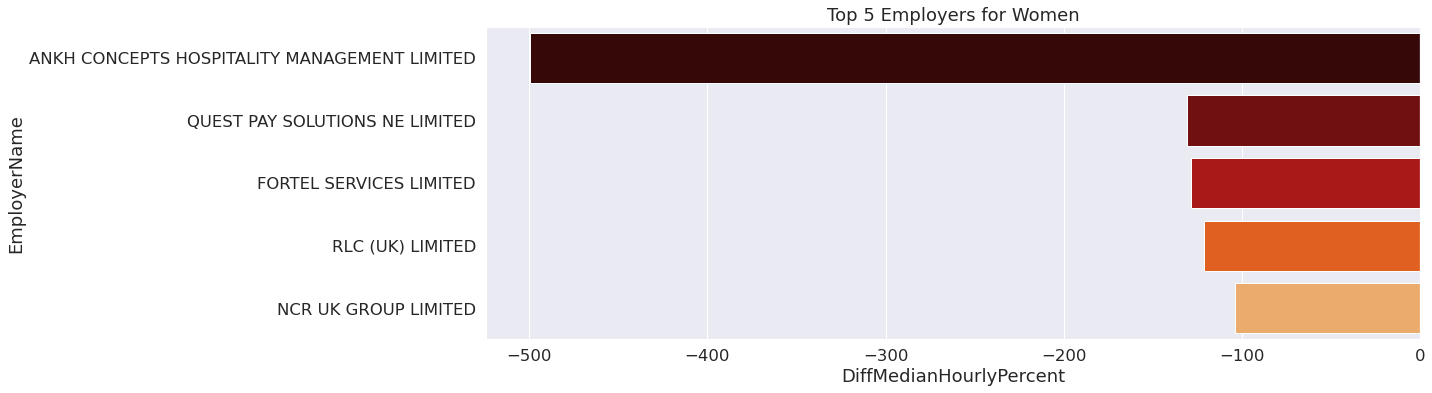

In [15]:
sns.barplot(data=last5_21,
            y = "EmployerName",
            x = 'DiffMedianHourlyPercent', 
            orient = "h",
           palette = "gist_heat"
           ).set(title='Top 5 Employers for Women')

On the flipside, there are employers that appear to largely favor women. However, researching these companies in the visualization it is evident that the gender disparity is heavily influenced by the industry of the employer, as women mostly occupy financing and hospitality jobs.

### Data Transformation for Visual Data Exploration

To create a comprehensive visualization, we decided to combine the results from the aforementioned analysis into one graph by merging the two small dataframes we created into one.

In [16]:
high_low_21 = pd.concat([top5_21, last5_21], axis = 0)

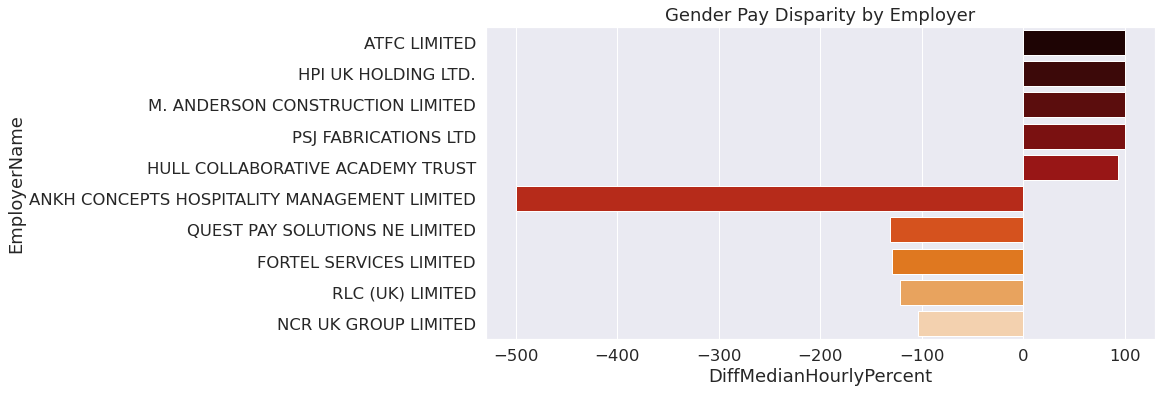

In [17]:
sns.set(rc={'figure.figsize':(12,5.75)}, font_scale = 1.5)
sns.barplot(data=high_low_21,
            y = "EmployerName",
            x = 'DiffMedianHourlyPercent', 
            orient = "h",
           palette = "gist_heat"
           ).set(title="Gender Pay Disparity by Employer")

plt.savefig('DiffMedianBar1.pdf')

***

## Data Transformation for Final Analysis

For the final analysis we wanted to observe all of our data in one dataframe. To be able to create visualizations with all three of the datasets we created a column for each containing the year for that dataset. We used this new column to merge each dataframe together into one large dataframe. Now with one large dataframe we went ahead and filled in NAN values with the mean of each column to have data representing each row even if it wasn't provided.

In [18]:
#ADDING A YEAR COLUMN  
gpg_19["Year"] = 2019
gpg_20["Year"] = 2020
gpg_21["Year"] = 2021

In [19]:
#MERGING DATAFRAMES ON THE YEAR COLUMN

merged = pd.concat([gpg_19, gpg_20], axis = 0)
final = pd.concat([merged,gpg_21], axis = 0)
final

,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,Year
0,'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...,11.5,10.3,NaN,NaN,0.0,0.0,53.0,47.0,41.0,59.0,40.0,60.0,62.0,38.0,1000 to 4999,2019
1,10 TRINITY SQUARE HOTEL LIMITED,8.7,10.3,29.6,54.5,90.5,90.5,47.9,52.1,56.3,43.7,78.9,21.1,66.7,33.3,250 to 499,2019
2,1LIFE MANAGEMENT SOLUTIONS LIMITED,11.0,-0.5,81.5,94.2,10.0,11.4,49.0,51.0,35.3,64.7,42.3,57.7,44.2,55.8,250 to 499,2019
3,1ST CHOICE STAFF RECRUITMENT LIMITED,-2.3,0.0,-114.8,-249.3,1.1,0.4,50.8,49.2,67.7,32.3,62.9,37.1,50.0,50.0,250 to 499,2019
4,1ST HOME CARE LTD.,-2.0,0.5,NaN,NaN,0.0,0.0,10.0,90.0,8.0,92.0,9.0,91.0,9.0,91.0,250 to 499,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,ZPG LIMITED,22.4,22.4,72.7,15.9,16.0,15.0,45.7,54.3,52.6,47.4,57.7,42.3,70.9,29.1,500 to 999,2021
10488,ZURICH EMPLOYMENT SERVICES LIMITED,26.5,24.4,55.4,36.0,96.9,95.5,35.9,64.1,43.0,57.0,53.1,46.9,67.8,32.2,1000 to 4999,2021
10489,ZURICH UK GENERAL SERVICES LIMITED,16.7,19.7,56.8,45.1,97.3,96.7,41.5,58.5,66.8,33.2,66.0,34.0,69.3,30.7,1000 to 4999,2021
10490,ZUTO LIMITED,16.0,6.0,10.0,35.0,66.0,75.0,64.0,36.0,58.0,42.0,71.0,29.0,70.0,30.0,250 to 499,2021


In [20]:
#REPLACING NULL VALUES WITH MEANS OF EACH PERCENTILE

meanBonus = final['DiffMeanBonusPercent'].mean()
medianBonus = final['DiffMedianBonusPercent'].mean()
mean_MaleLQ = final['MaleLowerQuartile'].mean()
mean_FemLQ = final['FemaleLowerQuartile'].mean()
mean_MaleLMQ = final['MaleLowerMiddleQuartile'].mean()
mean_FemLMQ = final['FemaleLowerMiddleQuartile'].mean()
mean_MaleUMQ = final['MaleUpperMiddleQuartile'].mean()
mean_FemUMQ = final['FemaleUpperMiddleQuartile'].mean()
mean_MaleTopQ = final['MaleTopQuartile'].mean()
mean_FemTopQ = final['FemaleTopQuartile'].mean()
final['DiffMeanBonusPercent'].fillna(value=meanBonus, inplace=True)
final['DiffMedianBonusPercent'].fillna(value=medianBonus, inplace=True)
final['MaleLowerQuartile'].fillna(value=mean_MaleLQ, inplace=True)
final['FemaleLowerQuartile'].fillna(value=mean_FemLQ, inplace=True)
final['MaleLowerMiddleQuartile'].fillna(value=mean_MaleLMQ, inplace=True)
final['FemaleLowerMiddleQuartile'].fillna(value=mean_FemLMQ, inplace=True)
final['MaleUpperMiddleQuartile'].fillna(value=mean_MaleUMQ, inplace=True)
final['FemaleUpperMiddleQuartile'].fillna(value=mean_FemUMQ, inplace=True)
final['MaleTopQuartile'].fillna(value=mean_MaleTopQ, inplace=True)
final['FemaleTopQuartile'].fillna(value=mean_FemTopQ, inplace=True)
final

,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,Year
0,'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...,11.5,10.3,21.101073,3.523732,0.0,0.0,53.0,47.0,41.0,59.0,40.0,60.0,62.0,38.0,1000 to 4999,2019
1,10 TRINITY SQUARE HOTEL LIMITED,8.7,10.3,29.600000,54.500000,90.5,90.5,47.9,52.1,56.3,43.7,78.9,21.1,66.7,33.3,250 to 499,2019
2,1LIFE MANAGEMENT SOLUTIONS LIMITED,11.0,-0.5,81.500000,94.200000,10.0,11.4,49.0,51.0,35.3,64.7,42.3,57.7,44.2,55.8,250 to 499,2019
3,1ST CHOICE STAFF RECRUITMENT LIMITED,-2.3,0.0,-114.800000,-249.300000,1.1,0.4,50.8,49.2,67.7,32.3,62.9,37.1,50.0,50.0,250 to 499,2019
4,1ST HOME CARE LTD.,-2.0,0.5,21.101073,3.523732,0.0,0.0,10.0,90.0,8.0,92.0,9.0,91.0,9.0,91.0,250 to 499,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,ZPG LIMITED,22.4,22.4,72.700000,15.900000,16.0,15.0,45.7,54.3,52.6,47.4,57.7,42.3,70.9,29.1,500 to 999,2021
10488,ZURICH EMPLOYMENT SERVICES LIMITED,26.5,24.4,55.400000,36.000000,96.9,95.5,35.9,64.1,43.0,57.0,53.1,46.9,67.8,32.2,1000 to 4999,2021
10489,ZURICH UK GENERAL SERVICES LIMITED,16.7,19.7,56.800000,45.100000,97.3,96.7,41.5,58.5,66.8,33.2,66.0,34.0,69.3,30.7,1000 to 4999,2021
10490,ZUTO LIMITED,16.0,6.0,10.000000,35.000000,66.0,75.0,64.0,36.0,58.0,42.0,71.0,29.0,70.0,30.0,250 to 499,2021


## Data Exploration for Final Analysis

Finally, we wanted to analyze everything we explored so far at a smaller scale now on our final dataframe we created by merging the dataframes for the years 2019, 2020, and 2021. By merging these dataframes on the year column we were able to create visualizations that disply changes over the years, as well as analyze the data using the previously mentioned variables. First we looked at the hourly pay and bonus pay difference over the years, the male to female ratio of hourly pay based on the provided quartile columns, then analyzed the difference in hourly pay based on employer size.

### Observing the Gap in Hourly Pay

To start the finalization of our analysis of pay disparity, we created some graphs looking at the difference in median and mean hourly pay, using the boxen plot as used at the start of analysis. With combined dataframes we were able to analyze this variable over the years 2019, 2020, and 2021 without having to measure it against another factor. Next, we created a histogram for the median hourly pay to gain insight of the pay disparity over all three years. We also observed the bonus pay variable to analyze for disparity, focusing on the median difference as the mean difference did not provide significant information.

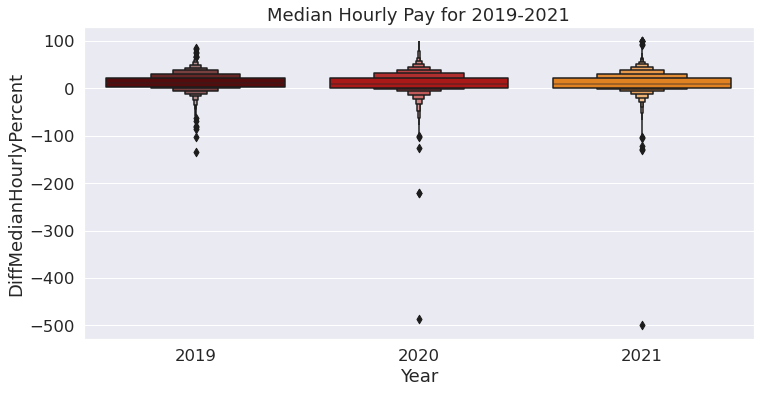

In [21]:
sns.boxenplot(data=final, 
            y = "DiffMedianHourlyPercent", 
            x = "Year",
            palette = "gist_heat"
             ).set(title="Median Hourly Pay for 2019-2021")

plt.savefig('DiffMedianYear.pdf')

From the above boxen plot we observe that the values above 0 represent men and the values below 0 represent women. From the boxen plot above we can see that between the years 2019 to 2021, the year 2020 has extreme outliers for women when compared to the years 2019 and 2021.

[Text(0.5, 1.0, 'Mean Hourly Pay for 2019-2021')]

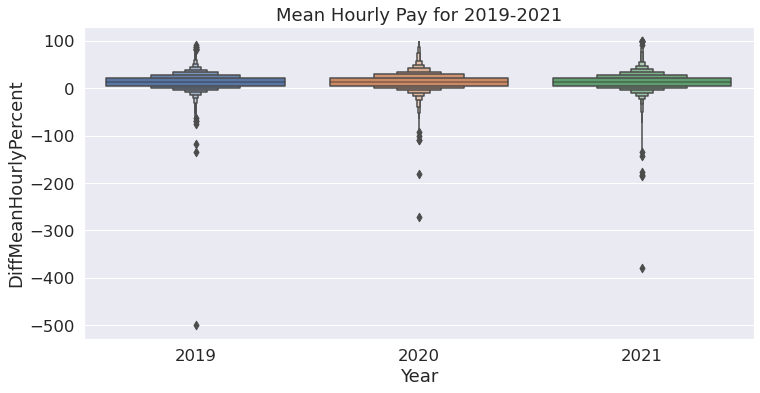

In [22]:
sns.boxenplot(data=final, 
            y = "DiffMeanHourlyPercent", 
            x = "Year"
             ).set(title="Mean Hourly Pay for 2019-2021")

The boxen plot for mean hourly pay shows similar trends like the previous boxen plot where men are favored more than women, with outliers representing some bias towards women. From the boxen plot we can clearly see that in the year 2019, there are more outliers than the other years indicating that in the year 2019 the mean hourly pay was a little more for women compared to 2020 and 2021.

[Text(0.5, 1.0, 'Median Hourly Pay')]

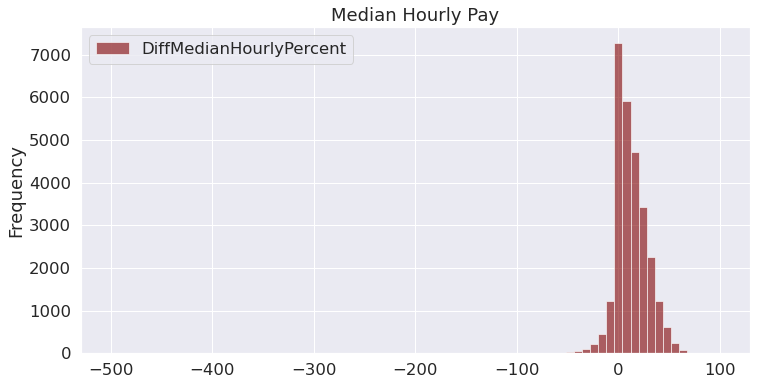

In [23]:
final['DiffMedianHourlyPercent'].plot(kind='hist', 
                                      bins=75, 
                                      figsize=[12,6], 
                                      alpha=.6, 
                                      legend=True, 
                                      color = 'maroon'
                                     ).set(title="Median Hourly Pay")

From the above histogram, we observe that the distribution of the difference in median hourly pay is severely-skewed to the left. Thus, we can infer that in most cases, men have higher hourly pay compared to women.

### Bonus Pay

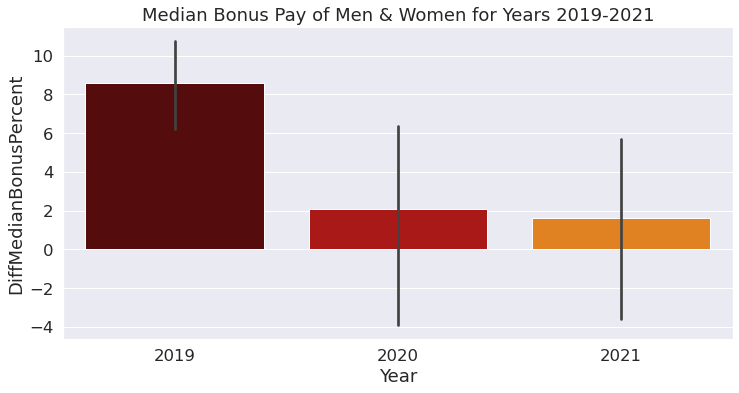

In [24]:
sns.barplot(data=final, 
            y = "DiffMedianBonusPercent", 
            x = "Year",
            palette = "gist_heat"
           ).set(title="Median Bonus Pay of Men & Women for Years 2019-2021")
plt.savefig('YearDiffMedBonus.pdf')

For 2019, we can observe that the percentage of median bonus pay is skewed towards men and that the ones for women aren't included in the plot. In 2020, it can be seen that the median of women receiving bonus pay is 3% comparatively lower than men. Following that, in 2021, the median of women receiving bonus pay was 2% bonus. Thus, based on this output, we can infer that there is a slight improvement in the probability that women will receive bonus pay.

### Male to Female Ratio of Hourly Pay

Next, we wanted to analyze the overall male to female hourly pay ratio of all three years together. To do this we calculated the average percentage of men and women in each quartile, assigning each value to a variable. We then used each variable to create a table to show two columns labeled male and female with each row showing the labeled quartile. By observing the table below, it is concluded that overall more men are in the top hourly pay quartile at 59.7% and more women are in the lower hourly pay quartile at 54.6%.

In [25]:
#FINDING THE MEANS FOR EACH PERCENTILE

MLQ_per = final['MaleLowerQuartile'].mean()
FLQ_per = final['FemaleLowerQuartile'].mean()
MaleLMQ_per = final['MaleLowerMiddleQuartile'].mean()
FemLMQ_per = final['FemaleLowerMiddleQuartile'].mean()
MaleUMQ_per = final['MaleUpperMiddleQuartile'].mean()
FemUMQ_per = final['FemaleUpperMiddleQuartile'].mean()
MaleTop_per = final['MaleTopQuartile'].mean()
FemTop_per = final['FemaleTopQuartile'].mean()

In [26]:
data = [{'Male': MLQ_per, 'Female': FLQ_per}, 
        {'Male': MaleLMQ_per , 'Female': FemLMQ_per}, 
        {'Male': MaleUMQ_per , 'Female':FemUMQ_per}, 
        {'Male': MaleTop_per, 'Female': FemTop_per}]
percent= pd.DataFrame(data, index=["Lower_Quartile",
                                   "LowerMiddle_Quartile",
                                   "UpperMiddle_Quartile",
                                   "Top_Quartile"])
percent

,Male,Female
Lower_Quartile,45.353374,54.646626
LowerMiddle_Quartile,49.841387,50.158613
UpperMiddle_Quartile,54.243593,45.756407
Top_Quartile,59.742682,40.257318


### Gender Disparity by Employer

To continue our analysis we looked at a sample of employers, again at each extreme, with 5 employers who had the highest median hourly pay for men and the 5 employers who had the highest median hourly pay for women with all three years combined. We created one comprehensive bar plot using the same strategy used earlier in analysis.

In [27]:
final.small = final.nsmallest(5, 'DiffMedianHourlyPercent')
final.large = final.nlargest(5, 'DiffMedianHourlyPercent')
final.highlow = pd.concat([final.small,final.large], axis = 0)

/tmp/ipykernel_55/3621132997.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  final.small = final.nsmallest(5, 'DiffMedianHourlyPercent')
/tmp/ipykernel_55/3621132997.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  final.large = final.nlargest(5, 'DiffMedianHourlyPercent')
/tmp/ipykernel_55/3621132997.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  final.highlow = pd.concat([final.small,final.large], axis = 0)


In [28]:
final.highlow

,EmployerName,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,Year
472,ANKH CONCEPTS HOSPITALITY MANAGEMENT LIMITED,-379.6,-499.5,21.101073,3.523732,0.0,0.0,45.353374,54.646626,49.841387,50.158613,54.243593,45.756407,59.742682,40.257318,250 to 499,2021
6518,NSS CLEANING LIMITED,-181.3,-487.2,-9087.300000,-14967.100000,12.3,5.3,98.200000,1.800000,100.000000,0.000000,100.000000,0.000000,67.300000,32.700000,250 to 499,2020
726,AUTO-SLEEPERS GROUP LIMITED,-42.5,-220.3,10.300000,-5.900000,52.2,29.5,100.000000,0.000000,50.000000,50.000000,0.000000,100.000000,100.000000,0.000000,250 to 499,2020
727,AUTO-SLEEPERS INVESTMENTS LIMITED,-42.5,-220.3,10.300000,-5.900000,52.2,29.5,100.000000,0.000000,50.000000,50.000000,0.000000,100.000000,100.000000,0.000000,250 to 499,2020
1747,DONALDSON TIMBER ENGINEERING LIMITED,-54.2,-134.0,-39.500000,-393.500000,72.0,75.0,97.900000,2.100000,98.900000,1.100000,78.900000,21.100000,76.600000,23.400000,250 to 499,2019
989,BEERE ELECTRICAL SERVICES LIMITED,100.0,100.0,100.000000,100.000000,57.1,0.0,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,Less than 250,2020
4057,HARVEY NICHOLS (OWN BRAND) STORES LIMITED,100.0,100.0,56.600000,46.700000,22.2,56.9,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,Not Provided,2020
4061,HARVEY NICHOLS RESTAURANTS LIMITED,100.0,100.0,21.101073,3.523732,0.0,3.2,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,Not Provided,2020
4702,J.C.B.EARTHMOVERS LIMITED,100.0,100.0,28.300000,0.000000,96.1,90.9,45.353374,54.646626,49.841387,50.158613,54.243593,45.756407,59.742682,40.257318,250 to 499,2020
4715,J5C MANAGEMENT LIMITED,100.0,100.0,41.300000,23.000000,6.4,7.4,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,500 to 999,2020


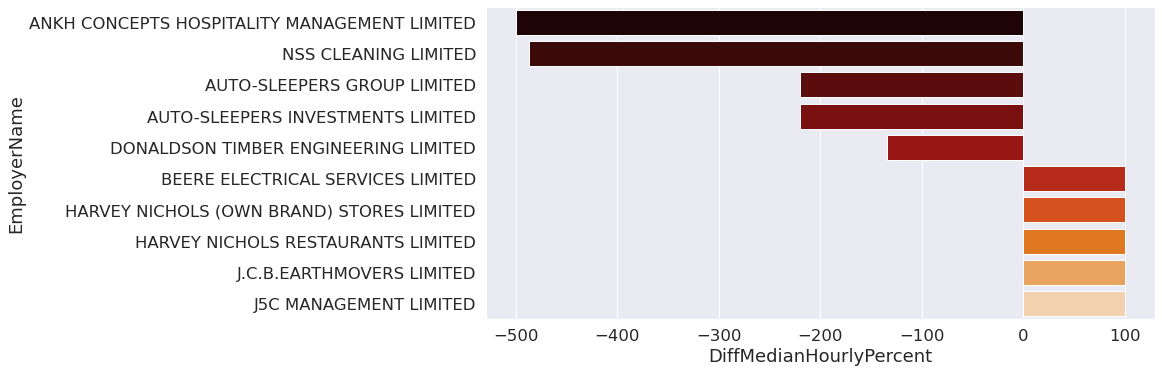

In [29]:
sns.barplot(data=final.highlow,
            y = "EmployerName",
            x = 'DiffMedianHourlyPercent', 
            orient = "h",
           palette = "gist_heat")
plt.savefig('EmpDiff.pdf')

The bar plot represents the the 5 largest and 5 smallest Hourly median pay across various companies between the years 2019 and 2021. We can see that the companies to the left of 0 represent the companies which favor women over men as they have large negative values. The companies to the right of 0 represent companies with positive Median values which represent men getting paid more . From the above bar plot we can clearly see the companies that women would prefer to work in.

### Gender Pay Disparity by Employer Size

Lastly, we analyzed the overall pay disparity based on employer size, focusing on the difference in the average hourly pay of men and women.

[Text(0.5, 1.0, 'Mean Hourly Pay Based on Employer Size')]

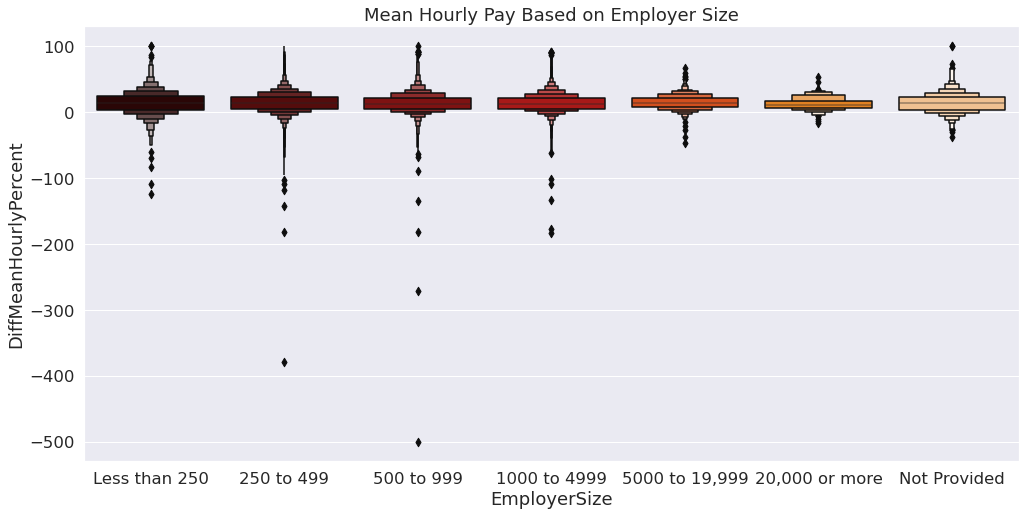

In [30]:
sns.set(rc={'figure.figsize':(16.75,8)}, font_scale = 1.5)
sns.boxenplot(data=final, 
              x = "EmployerSize", 
              y = "DiffMeanHourlyPercent",
              order = ["Less than 250", "250 to 499", "500 to 999", "1000 to 4999",
                        "5000 to 19,999", "20,000 or more", "Not Provided"],
              palette = "gist_heat"
             ).set(title="Mean Hourly Pay Based on Employer Size")

From the boxen plot above we can observe that the average hourly pay for women is higher in companies with less number of employees. Companies where the number of employees are larger tend to favor men more than women according to the boxen plot

## Conclusion

After our analysis we came to a series of conclusions based on our results. By looking at the disparity in hourly pay, it is possible the increase in gender diversity also displays an increase in pay disparity with the outliers, women receiving a higher hourly pay, becoming more frequent. This possibility would actually be a positive outcome as it implies increased equity that cannot be as easily observed through the data we were using. Employers with less employees may be benefical for women receiving a higher hourly pay. Although the analysis still showed men received on average a higher hourly pay, the possibility of women recieving equitable income is more likely. Overall men make more hourly pay compared to women, with women more likely to make much less than men. The industry of the employer affects the gender diversity amongst companies, and as a result this showed extreme results with gender pay disparity. Men are more likely to receive bonus pay over women, however, the dominance of men receiving bonuses over women has decreased, likely because of the pandemic. The bonus pay women receive present as outliers compared to the range at which men receive bonuses, affecting the probability range of men or women receiving a bonus by a sigificant amount.
